In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Generator/2019loans.csv')
df.head()


,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,target
0,7000.0,0.1894,256.38,MORTGAGE,75000.0,Not Verified,n,28.62,0.0,2.0,...,87.5,0.0,0.0,352260.0,62666.0,35000.0,10000.0,N,N,low_risk
1,40000.0,0.1614,975.71,MORTGAGE,102000.0,Source Verified,n,11.72,2.0,0.0,...,0.0,0.0,0.0,294664.0,109911.0,9000.0,71044.0,N,N,low_risk
2,11000.0,0.2055,294.81,RENT,45000.0,Verified,n,37.25,1.0,3.0,...,7.7,0.0,0.0,92228.0,36007.0,33000.0,46328.0,N,N,low_risk
3,4000.0,0.1612,140.87,MORTGAGE,38000.0,Not Verified,n,42.89,1.0,0.0,...,100.0,0.0,0.0,284273.0,52236.0,13500.0,52017.0,N,N,low_risk
4,14000.0,0.1797,505.93,MORTGAGE,43000.0,Source Verified,n,22.16,1.0,0.0,...,25.0,0.0,0.0,120280.0,88147.0,33300.0,78680.0,N,N,low_risk


In [8]:
#display(list(df.columns.values))

In [3]:
X = df.drop('target', axis=1)
X.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,7000.0,0.1894,256.38,MORTGAGE,75000.0,Not Verified,n,28.62,0.0,2.0,...,100.0,87.5,0.0,0.0,352260.0,62666.0,35000.0,10000.0,N,N
1,40000.0,0.1614,975.71,MORTGAGE,102000.0,Source Verified,n,11.72,2.0,0.0,...,85.7,0.0,0.0,0.0,294664.0,109911.0,9000.0,71044.0,N,N
2,11000.0,0.2055,294.81,RENT,45000.0,Verified,n,37.25,1.0,3.0,...,94.3,7.7,0.0,0.0,92228.0,36007.0,33000.0,46328.0,N,N
3,4000.0,0.1612,140.87,MORTGAGE,38000.0,Not Verified,n,42.89,1.0,0.0,...,92.9,100.0,0.0,0.0,284273.0,52236.0,13500.0,52017.0,N,N
4,14000.0,0.1797,505.93,MORTGAGE,43000.0,Source Verified,n,22.16,1.0,0.0,...,84.1,25.0,0.0,0.0,120280.0,88147.0,33300.0,78680.0,N,N


In [4]:
X_dummies = pd.get_dummies(X)
print(X_dummies.columns)
X_dummies.head()

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,7000.0,0.1894,256.38,75000.0,28.62,0.0,2.0,20.0,0.0,40414.0,...,0,1,1,0,1,0,1,0,1,0
1,40000.0,0.1614,975.71,102000.0,11.72,2.0,0.0,10.0,0.0,43531.0,...,0,1,0,1,1,0,1,0,1,0
2,11000.0,0.2055,294.81,45000.0,37.25,1.0,3.0,23.0,0.0,8242.0,...,1,1,0,1,1,0,1,0,1,0
3,4000.0,0.1612,140.87,38000.0,42.89,1.0,0.0,7.0,0.0,12767.0,...,0,1,0,1,0,1,1,0,1,0
4,14000.0,0.1797,505.93,43000.0,22.16,1.0,0.0,22.0,0.0,11182.0,...,0,1,0,1,1,0,1,0,1,0


In [5]:
X_dummies.dtypes.head(50)

loan_amnt                     float64
int_rate                      float64
installment                   float64
annual_inc                    float64
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
total_acc                     float64
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt                   float64
total_pymnt_inv               float64
total_rec_prncp               float64
total_rec_int                 float64
total_rec_late_fee            float64
recoveries                    float64
collection_recovery_fee       float64
last_pymnt_amnt               float64
collections_12_mths_ex_med    float64
policy_code                   float64
acc_now_delinq                float64
tot_coll_amt                  float64
tot_cur_bal                   float64
open_acc_6m 

In [6]:
y_label = LabelEncoder().fit_transform(df['target'])
y_label

array([1, 1, 1, ..., 0, 0, 0])

In [18]:
#display(list(X_dummies.columns.values))

In [7]:
df1 = pd.read_csv('Generator/2020Q1loans.csv')
df1.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,target
0,40000.0,0.1033,856.40,RENT,128700.0,Source Verified,n,12.47,0.0,1.0,...,57.1,0.0,0.0,63915.0,49510.0,49400.0,14515.0,Y,N,low_risk
1,24450.0,0.1430,572.72,MORTGAGE,44574.0,Not Verified,n,15.05,0.0,1.0,...,0.0,0.0,0.0,136425.0,19439.0,15500.0,18925.0,N,N,low_risk
2,13500.0,0.1430,316.23,OWN,60000.0,Not Verified,n,28.72,0.0,0.0,...,0.0,0.0,0.0,82124.0,65000.0,5400.0,61724.0,Y,N,low_risk
3,10625.0,0.1774,268.31,RENT,60000.0,Verified,n,15.70,0.0,4.0,...,20.0,0.0,0.0,54855.0,50335.0,23200.0,26255.0,N,N,low_risk
4,6375.0,0.1862,232.46,RENT,60000.0,Source Verified,n,35.50,0.0,0.0,...,75.0,0.0,0.0,90445.0,56541.0,15300.0,72345.0,N,N,low_risk


In [50]:
#display(list(df1.columns.values))

In [8]:
X1 = df1.drop('target', axis=1)
X1.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,40000.0,0.1033,856.40,RENT,128700.0,Source Verified,n,12.47,0.0,1.0,...,84.2,57.1,0.0,0.0,63915.0,49510.0,49400.0,14515.0,Y,N
1,24450.0,0.1430,572.72,MORTGAGE,44574.0,Not Verified,n,15.05,0.0,1.0,...,100.0,0.0,0.0,0.0,136425.0,19439.0,15500.0,18925.0,N,N
2,13500.0,0.1430,316.23,OWN,60000.0,Not Verified,n,28.72,0.0,0.0,...,100.0,0.0,0.0,0.0,82124.0,65000.0,5400.0,61724.0,Y,N
3,10625.0,0.1774,268.31,RENT,60000.0,Verified,n,15.70,0.0,4.0,...,91.4,20.0,0.0,0.0,54855.0,50335.0,23200.0,26255.0,N,N
4,6375.0,0.1862,232.46,RENT,60000.0,Source Verified,n,35.50,0.0,0.0,...,100.0,75.0,0.0,0.0,90445.0,56541.0,15300.0,72345.0,N,N


In [13]:
X1_dummies = pd.get_dummies(X1)
print(X1_dummies.columns)
X1_dummies.head()

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,40000.0,0.1033,856.40,128700.0,12.47,0.0,1.0,8.0,0.0,38113.0,...,1,0,1,0,1,1,0,0,1,1
1,24450.0,0.1430,572.72,44574.0,15.05,0.0,1.0,6.0,0.0,1665.0,...,0,0,1,0,1,1,0,1,0,1
2,13500.0,0.1430,316.23,60000.0,28.72,0.0,0.0,8.0,0.0,13857.0,...,0,0,1,0,1,1,0,0,1,1
3,10625.0,0.1774,268.31,60000.0,15.70,0.0,4.0,17.0,0.0,6216.0,...,0,1,1,0,1,1,0,1,0,1
4,6375.0,0.1862,232.46,60000.0,35.50,0.0,0.0,13.0,0.0,12681.0,...,1,0,1,0,1,1,0,1,0,1


In [14]:
y1_label = LabelEncoder().fit_transform(df1['target'])
y1_label

array([1, 1, 1, ..., 0, 0, 0])

In [15]:
display(list(X1_dummies.columns.values))

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_

In [16]:
set2019 =set((X_dummies.columns.values)) 
set2020=set((X1_dummies.columns.values)) 
missing_columns = set2019.difference(set2020)
print("Missing columns :", missing_columns)

Missing columns : {'debt_settlement_flag_Y'}


In [17]:
X1_dummies["debt_settlement_flag_Y"] = 0
X1_dummies.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,40000.0,0.1033,856.40,128700.0,12.47,0.0,1.0,8.0,0.0,38113.0,...,0,1,0,1,1,0,0,1,1,0
1,24450.0,0.1430,572.72,44574.0,15.05,0.0,1.0,6.0,0.0,1665.0,...,0,1,0,1,1,0,1,0,1,0
2,13500.0,0.1430,316.23,60000.0,28.72,0.0,0.0,8.0,0.0,13857.0,...,0,1,0,1,1,0,0,1,1,0
3,10625.0,0.1774,268.31,60000.0,15.70,0.0,4.0,17.0,0.0,6216.0,...,1,1,0,1,1,0,1,0,1,0
4,6375.0,0.1862,232.46,60000.0,35.50,0.0,0.0,13.0,0.0,12681.0,...,0,1,0,1,1,0,1,0,1,0


### LogisticRegression Model

In [18]:
reg = LogisticRegression(max_iter=200000).fit(X_dummies, y_label)

#reg.score(X1_dummies,y1_label)
print(f"Training Data Score: {reg.score(X_dummies, y_label)}")
print(f"Testing Data Score: {reg.score(X1_dummies, y1_label)}")

print('Model:Logistic Regression')
print(f'score:{reg.score(X1_dummies, y1_label)}\n')


Training Data Score: 0.7054187192118226
Testing Data Score: 0.5642279880901744
Model:Logistic Regression
score:0.5642279880901744



In [19]:
target_names = ["low_risk", "high_risk"]

In [20]:
predictions = reg.predict(X1_dummies)

y_true = y1_label
y_pred = reg.predict(X1_dummies)
#print(y_pred)
confusion_matrix(y_true, y_pred)
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=["low_risk", "high_risk"]))
      

[[ 828 1523]
 [ 526 1825]]
              precision    recall  f1-score   support

    low_risk       0.61      0.35      0.45      2351
   high_risk       0.55      0.78      0.64      2351

    accuracy                           0.56      4702
   macro avg       0.58      0.56      0.54      4702
weighted avg       0.58      0.56      0.54      4702



### RandomForestRegression Model

In [28]:
ran = RandomForestClassifier(random_state=1, n_estimators=2000, max_depth=10).fit(X_dummies, y_label)
y_pred = ran.predict(X1_dummies)
y_true = y1_label
confusion_matrix(y_true, y_pred)



array([[1890,  461],
       [1075, 1276]], dtype=int64)

In [29]:
print(classification_report(y1_label, y_pred, target_names=target_names))
print(f'Training Score: {ran.score(X_dummies, y_label)}')
print(f'Testing Score: {ran.score(X1_dummies, y1_label)}')

              precision    recall  f1-score   support

    low_risk       0.64      0.80      0.71      2351
   high_risk       0.73      0.54      0.62      2351

    accuracy                           0.67      4702
   macro avg       0.69      0.67      0.67      4702
weighted avg       0.69      0.67      0.67      4702

Training Score: 0.8631362889983579
Testing Score: 0.67333049766057


[1.59585047e-02 5.41983635e-02 3.01659831e-02 8.25985083e-03
 8.54185141e-03 1.96998445e-03 3.34111223e-03 4.39781163e-03
 6.21295982e-04 9.56370578e-03 5.97088083e-03 3.41130545e-02
 3.48351127e-02 6.76108906e-02 6.66341244e-02 7.60881781e-02
 7.75971292e-02 3.29789893e-02 0.00000000e+00 0.00000000e+00
 1.77801368e-01 3.37755107e-04 0.00000000e+00 0.00000000e+00
 2.67377836e-03 8.00606265e-03 2.85130962e-03 3.32184300e-03
 2.08171111e-03 3.22468740e-03 6.25380173e-03 7.14991207e-03
 7.99630112e-03 3.31718742e-03 5.70702494e-03 1.04090488e-02
 7.55012012e-03 1.07172732e-02 3.33000483e-03 3.53562547e-03
 5.20563587e-03 7.65915502e-03 8.28709093e-03 1.09168321e-02
 7.95710284e-03 1.94128464e-04 0.00000000e+00 8.84116760e-03
 1.07426596e-02 7.37193822e-03 6.04236966e-03 3.37093222e-03
 8.08207699e-03 7.42013175e-03 2.40142814e-03 3.58677222e-03
 4.26373248e-03 3.55549890e-03 4.34886397e-03 5.16520217e-03
 4.29260141e-03 4.86366222e-03 4.32931467e-03 4.49518896e-03
 0.00000000e+00 0.000000

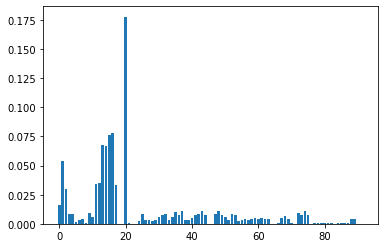

In [30]:
# Feature Selection Methods - trying to feed the model with the most appropriate features  
# to remove redundant and correlated features.
%matplotlib inline
from matplotlib import pyplot as plt

features = ran.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

### Data Scaling

LogisticRegression Model = Scaled

In [31]:
scaler = StandardScaler().fit(X_dummies)

X_dummies_scaled = scaler.transform(X_dummies)
X1_dummies_scaled = scaler.transform(X1_dummies) 

In [32]:
reg_scaled = LogisticRegression(max_iter=10000).fit(X_dummies_scaled, y_label)
reg_scaled.score(X1_dummies_scaled,y1_label)

print(f'Training Score: {reg_scaled.score(X_dummies_scaled, y_label)}')
print(f'Testing Score: {reg_scaled.score(X1_dummies_scaled, y1_label)}')
print(f'LogisticRegression Score:{reg_scaled.score(X1_dummies_scaled,y1_label)}\n')


Training Score: 0.710919540229885
Testing Score: 0.7598894087622289
LogisticRegression Score:0.7598894087622289



RandomForestRegression Model - Scaled

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [33]:
ran_scaled = RandomForestClassifier(random_state=0, n_estimators=500).fit(X_dummies_scaled, y_label)
ran_scaled.score(X1_dummies_scaled,y1_label)
y_ran_scaled_pred = ran_scaled.predict(X1_dummies_scaled)
print(classification_report(y1_label, y_ran_scaled_pred, target_names=target_names))

y_true = y1_label
confusion_matrix(y_true, y_ran_scaled_pred)


              precision    recall  f1-score   support

    low_risk       0.61      0.83      0.70      2351
   high_risk       0.73      0.46      0.57      2351

    accuracy                           0.65      4702
   macro avg       0.67      0.65      0.63      4702
weighted avg       0.67      0.65      0.63      4702



array([[1954,  397],
       [1268, 1083]], dtype=int64)

In [34]:
print(f'Training Score: {ran_scaled.score(X_dummies_scaled, y_label)}')
print(f'Testing Score: {ran_scaled.score(X1_dummies_scaled, y1_label)}')
print(f'RandomForestRegression Score:{ran_scaled.score(X1_dummies_scaled,y1_label)}\n')


Training Score: 1.0
Testing Score: 0.6458953636750319
RandomForestRegression Score:0.6458953636750319



RandomForest-Feature-Selection

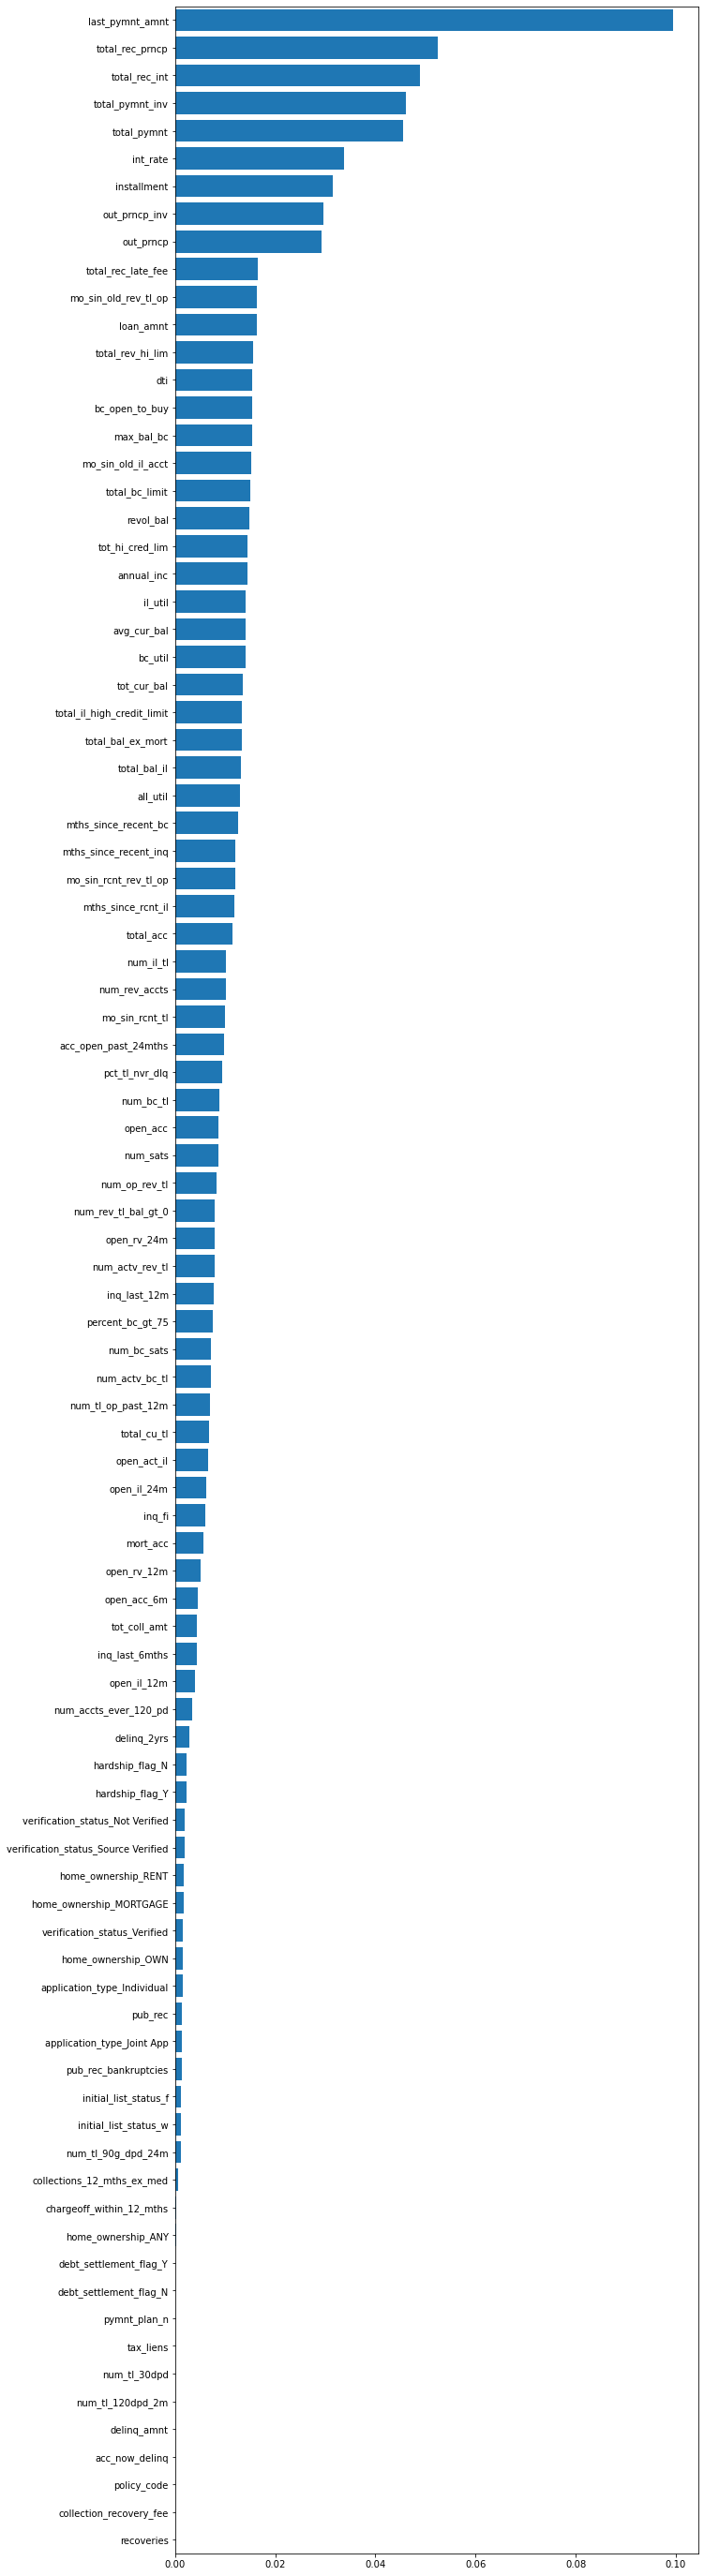

In [35]:
feature_importances = ran_scaled.feature_importances_
features1 = sorted(zip(X_dummies.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features1]
width = [f[1] for f in features1]

fig, ax = plt.subplots()

fig.set_size_inches(10,50)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [40]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(ran_scaled)
sel.fit(X_dummies_scaled, y_label)
sel.get_support()

array([ True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [42]:

scaler = StandardScaler().fit(X_dummies_scaled)
X_selected_dummies_scaled = sel.transform(X_dummies_scaled)
X1_selected_dummies_scaled = sel.transform(X1_dummies_scaled)


In [43]:
clff = LogisticRegression(max_iter = 10000).fit(X_dummies_scaled, y_label) 

In [44]:
clff = LogisticRegression(max_iter = 10000)
clff.fit (X_selected_dummies_scaled, y_label)
print(f'Training Score: {clff.score(X_selected_dummies_scaled, y_label)}')
print(f'Testing Score: {clff.score(X1_selected_dummies_scaled, y1_label)}')

Training Score: 0.7104269293924467
Testing Score: 0.7715865589111016
